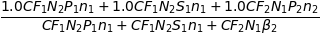

In [46]:
from sympy import *
from sympy.stats import *
from sympy.abc import *
from functools import reduce

init_printing()

Qty = symbols("Qty")
n1, n2, n3, n4 = symbols("n_1 n_2 n_3 n_4")
N1, N2, N3, N4 = symbols("N_1 N_2 N_3 N_4")
P1, P2, P3, P4 = symbols("P_1 P_2 P_3 P_4")
S0, S1, S2, S3, S4 = symbols("S_0 S_1 S_2 S_3 S_4")
CF0, CF1, CF2, CF3, CF4 = symbols("CF_0 CF_1 CF_2 CF_3 CF_4")
a1, a2, a3, a4 = symbols("alpha_1 alpha_2 alpha_3 alpha_4") 
b1, b2, b3, b4 = symbols("beta_1 beta_2 beta_3 beta_4") 
fx_usdjpy, fx_eurjpy = symbols("FX_usdjpy FX_eurjpy")
shift = symbols("Shift")

def gama(cf, p, s, n): return cf*(p+s)/n

def price(cf1, p1, s1, a1, n1, N1, fx, N2, a2, b2, s2, cf2, l): 
    return 1/4*(gama(cf1, p1, s1, N1)*(a1+n1*fx) + (1/N2*(a2+fx*b2)+S2)*cf2+l)

def pv(qty, cf, p, s): 
    return qty*cf*(p+s)

def d(Qty, CF0, CF1, P1, S1, a1, n1, N1, fx_usdjpy, N2, a2, b2, S2, CF2, lamda, S0, s):
    up = price(CF1, P1, S1, a1, n1, N1, fx_usdjpy + s, N2, a2, b2, S2, CF2, lamda)
    down = price(CF1, P1, S1, a1, n1, N1, fx_usdjpy- s, N2, a2, b2, S2, CF2, lamda)
    return (pv(Qty, CF0, up, S0) - pv(Qty, CF0, down, S0))/2

pv_base=pv(Qty, CF0, price(CF1, P1, S1, a1, n1, N1, fx_usdjpy, N2, a2, b2, S2, CF2, lamda), S0) 
p_up=price(CF1, P1, S1, a1, n1, N1, fx_usdjpy+shift, N2, a2, b2, S2, CF2, lamda)
p_down=price(CF1, P1, S1, a1, n1, N1, fx_usdjpy-shift, N2, a2, b2, S2, CF2, lamda)
pv_up=pv(Qty, CF0, p_up, S0)
pv_down=pv(Qty, CF0, p_down, S0)

f=d(Qty, CF0, CF1, P1, S1, a1, n1, N1, fx_usdjpy, N2, a2, b2, S2, CF2, lamda, S0, shift)
g=simplify(Qty*CF0/4*(n1/N1*(P1+S1)*CF1) + Qty*CF0/4*(n2/N2*(P2)*CF2))
collect(simplify(g/f*shift), P1)

In [41]:
P1=40.213
S1=1
FX1=113.46766362517641
CF1=1

P2FX2=4552.6664944317308
S2=2
CF2=1

P3=37123
S3=3
CF3=.1589873

P4=15.125652173913045
S4=4
FX4=107.79426318536517
CF4=.588441

1/4*((P1+S1)*FX1*CF1 + (P2FX2+S2)*CF2 + (P3+S3)*CF3+(P4+S4)*FX4*CF4)


In [47]:
FX=113.47
P1=40.213
S1=1
n1=22
N1=22
CF1=1
a1=0

S2=2
n2=22
N2=22
CF2=1
a2=0
b2=40.123

P3=37123
S3=3
CF3=.1589873

P4=40.213
S4=1
n4=22
N4=22
CF4=1
a4=0

1/4*((P1+S1)/N1*(a1+n1*FX)*CF1 + (1/N2*(a2+FX*b2)+S2)*CF2 + (P3+S3)*CF3 + (P4+S4)/N4*(a4+n4*FX)*CF4)